In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [86]:
def load_cover_trace(filename, interval="5ms"):
    data = pd.read_csv(filename, sep="\t")
    data["udp.srcport"] = ~data["udp.srcport"].isin((443, ))
    data = data.rename(columns={"frame.time_epoch": "time", "udp.length": "length", "udp.srcport": "is_outgoing"})
    data = data.sort_values(by="time").reset_index(drop=True)
    data["time"] = (data["time"] - data.loc[0, "time"]) * 1e3
    
    data["time"] = pd.to_datetime(data["time"], unit="ms")
    data = data.groupby("is_outgoing").resample(interval, on="time", origin="epoch").sum().drop(columns="is_outgoing")
    data = data.unstack(level="is_outgoing").fillna(0).astype(int)
    data.columns = ["incoming", "outgoing"]
    return data

load_cover_trace("../results/scratch/google-trace.csv")

,incoming,outgoing
time,,
1970-01-01 00:00:00.000,1345,1345
1970-01-01 00:00:00.005,0,1345
1970-01-01 00:00:00.010,0,0
1970-01-01 00:00:00.015,4052,50
1970-01-01 00:00:00.020,0,50
...,...,...
1970-01-01 00:00:05.205,0,0
1970-01-01 00:00:05.210,0,0
1970-01-01 00:00:05.215,0,0


In [63]:
def load_schedule(filename, interval="5ms"):
    data = pd.read_csv(filename, header=None, names=["time", "length"])
    data["is_outgoing"] = data["length"] > 0
    data["length"] = data["length"].abs()
    
    data = data.sort_values(by="time").reset_index(drop=True)
    data["time"] = (data["time"] - data.loc[0, "time"]) * 1e3
    
    data["time"] = pd.to_datetime(data["time"], unit="ms")
    data = data.groupby("is_outgoing").resample(interval, on="time", origin="epoch").sum().drop(columns="is_outgoing")
    #data["time"] = (data["time"]- dt.datetime(1970,1,1)).dt.total_seconds()
    
    data = data.unstack(level="is_outgoing").fillna(0).astype(int)
    data.columns = ["incoming", "outgoing"]
    return data
    

load_schedule("../results/scratch/google.csv")

,incoming,outgoing
time,,
1970-01-01 00:00:00.000,2100,0
1970-01-01 00:00:00.005,1400,0
1970-01-01 00:00:00.010,0,0
1970-01-01 00:00:00.015,1400,0
1970-01-01 00:00:00.020,0,0
...,...,...
1970-01-01 00:00:05.105,0,0
1970-01-01 00:00:05.110,0,0
1970-01-01 00:00:05.115,0,0


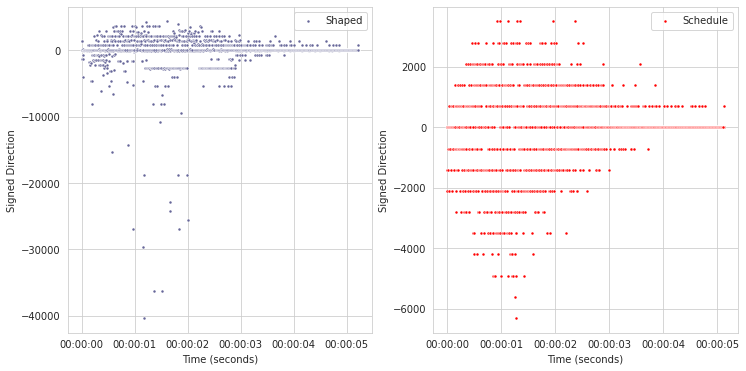

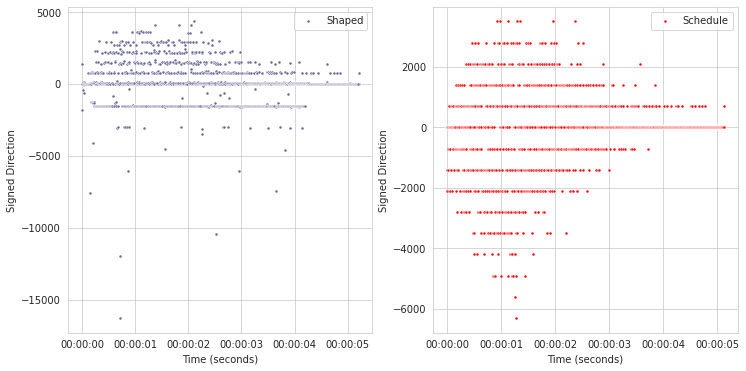

In [91]:
def plot(trace, schedule):
    trace["incoming"] *= -1
    schedule["incoming"] *= -1
    with sns.axes_style("whitegrid"):
        figure, (axes, axes2) = plt.subplots(1, 2, figsize=(12, 6))
        
        sns.scatterplot(x="time", y="incoming", data=trace, marker='.', ax=axes, label="Shaped", color="#666699")
        sns.scatterplot(x="time", y="outgoing", data=trace, marker='.', ax=axes, color="#666699")
        
        sns.scatterplot(x="time", y="incoming", data=schedule, marker='.', ax=axes2, label="Schedule", color="red")
        sns.scatterplot(x="time", y="outgoing", data=schedule, marker='.', ax=axes2, color="red")
        
        # axes.set_ylim(-6000, 6000)
        axes.set_xlabel("Time (seconds)")
        axes.set_ylabel("Signed Direction")
        axes2.set_xlabel("Time (seconds)")
        axes2.set_ylabel("Signed Direction")
        
        return figure

_ = plot(load_cover_trace("../results/scratch/google-trace.csv", interval="5ms"), load_schedule("../results/scratch/google.csv", interval="5ms"))
_ = plot(load_cover_trace("../results/scratch/ols-trace.csv", interval="5ms"), load_schedule("../results/scratch/ols-schedule.csv", interval="5ms"))